# Data Exploration
## Lab 1

World Health Organization has estimated 12 million deaths occur worldwide, every year due to 
Heart diseases. Half the deaths in the United States and other developed countries are due to 
cardiovascular diseases. The early prognosis of cardiovascular diseases can aid in making 
decisions on lifestyle changes in high-risk patients and in turn reduce the complications. The 
dataset framingham.csv is publically available on the Kaggle website, and it is from an ongoing 
cardiovascular study on residents of the town of Framingham, Massachusetts. Each variable 
considered in this studied is a potential risk factor. There are both demographic, behavioral and 
medical risk factors. The variables are the following: <br>
<br>
Demographic:<br> 
• sex: male or female.<br>
• age: age of the patient.<br>


Behavioural current<br>
• Education: education level, being 0 the lowest level.<br>
• Smoker: whether or not the patient is a current smoker.<br>
• cigsPerDay: the number of cigarettes that the person smoked on average in one day.<br>

Medical ( history):<br>
• BPMeds: whether or not the patient was on blood pressure medication.<br>
• prevalentStroke: whether or not the patient had previously had a stroke.<br>
• prevalentHyp: whether or not the patient was hypertensive.<br>
• diabetes: whether or not the patient had diabetes.<br>

Medical(current):<br>
• totChol: total cholesterol level.<br>
• sysBP: systolic blood pressure.<br>
• diaBP: diastolic blood pressure.<br>
• BMI: Body Mass Index.<br>
• heartRate: heart rate.<br>
• glucose: glucose level.<br>

Predict variable (desired target):<br>
• 10 year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)<br>

#Load data with Pandas


https://www.kaggle.com/datasets/saurabh00007/diabetescsv

# diabetesdata.csv

In [34]:
# Step 1:
# Import the data into Python.
import pandas as pd 
df = pd.read_csv("D:\MachineLearning\project\diabetes.csv")   #Copied the path of the csv file
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7520\3175891334.py:4: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\MachineLearning\project\diabetes.csv")   #Copied the path of the csv file


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Q1 : What are the data types of each column?
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
# Q 2: How many rows and columns does the dataset have?
df.shape

(768, 9)

In [5]:
# Q 3: Q: Which variables are categorical and which are numerical?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Q4: Which variables have missing values, and how many?
df.isna().sum()   #df.isna() gives True or False for each cell with table

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Q5: What percentage of the dataset is missing for each column?
missing_percentage = df.isnull().mean() * 100  # Calculate missing percentage 
missing_percentage

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [8]:
# Q6: Are there any duplicate rows in the dataset?
d= df.duplicated().sum()  # Count duplicate rows
d
int(d)

0

In [9]:
# Q7: What are the minimum and maximum values for Age, BloodPressure, and Glucose?
df[['Age','BloodPressure','Glucose']].agg(['min','max'])  #agg is used to apply multiple functions at once



,Age,BloodPressure,Glucose
min,21,0,0
max,81,122,199


In [10]:
# Q8: Which variables are most strongly correlated with glucose?
correlations = df.corr(numeric_only=True)['Glucose'].sort_values(ascending=False)
correlations  #corr() gives correlation values of all columns with each other

Glucose                     1.000000
Outcome                     0.466581
Insulin                     0.331357
Age                         0.263514
BMI                         0.221071
BloodPressure               0.152590
DiabetesPedigreeFunction    0.137337
Pregnancies                 0.129459
SkinThickness               0.057328
Name: Glucose, dtype: float64

In [11]:
# Q9: What is the average blood pressure across age groups (<30, 30–50, >50)?
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 50, float('inf')], labels=['<30', '30-50', '>50'])
df.groupby('AgeGroup')['BloodPressure'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7520\4003855344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['BloodPressure'].mean()


AgeGroup
<30      65.323741
30-50    72.162963
>50      78.382716
Name: BloodPressure, dtype: float64

In [13]:
# Q10: Classify the variables (nominal, ordinal, discrete, continuous).

variable_types = {
    'Pregnancies': 'Discrete',
    'Glucose': 'Continuous',
    'BloodPressure': 'Continuous',
    'SkinThickness': 'Discrete',
    'Insulin': 'Discrete',
    'BMI': 'Continuous',
    'DiabetesPedigreeFunction': 'Continuous',
    'Age': 'Discrete',
    'Outcome': 'Discrete'
}

# Display the classification
for variable, vtype in variable_types.items():
    print(f"{variable}: {vtype}")


Pregnancies: Discrete
Glucose: Continuous
BloodPressure: Continuous
SkinThickness: Discrete
Insulin: Discrete
BMI: Continuous
DiabetesPedigreeFunction: Continuous
Age: Discrete
Outcome: Discrete


In [14]:
#Q11: What is the distribution of the target variable (diabetes)?

outcome_distribution = df['Outcome'].value_counts()
outcome_distribution


Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
#Q12: What percentage of the dataset belongs to each class?
df['Outcome'].value_counts(normalize=True) * 100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

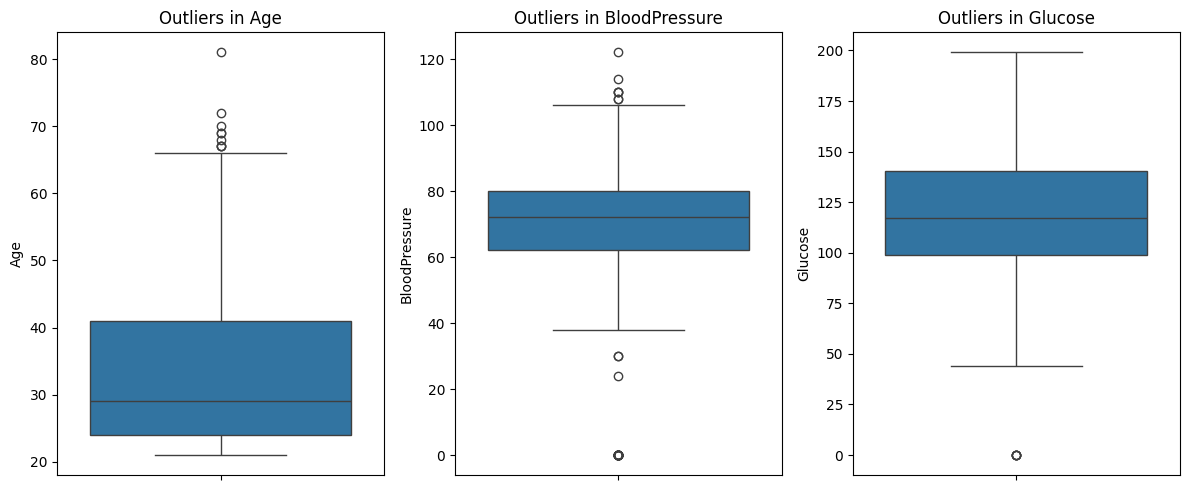

In [16]:
#Q13:Can we detect outliers in Age, BloodPressure, and Glucose? Use Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))

# Create subplots for each variable
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'])
plt.title('Outliers in Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['BloodPressure'])
plt.title('Outliers in BloodPressure')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Glucose'])
plt.title('Outliers in Glucose')

# Adjust layout
plt.tight_layout()
plt.show()



In [17]:
#Q13: Extract and print the variable names (column names)
columns = df.columns.tolist()
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'AgeGroup']

In [18]:
#Q14: Check that age does not contain errors.

out_of_range = df[(df['Age'] < 0) | (df['Age'] > 120)]
print("Rows where Age is out of range:")
print(out_of_range)


#Without any missing values cannot say there is no error! There could be dirty data


Rows where Age is out of range:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome, AgeGroup]
Index: []


In [19]:
#Q15:Calculate some descriptive statistics for BloodPressure
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

<Axes: >

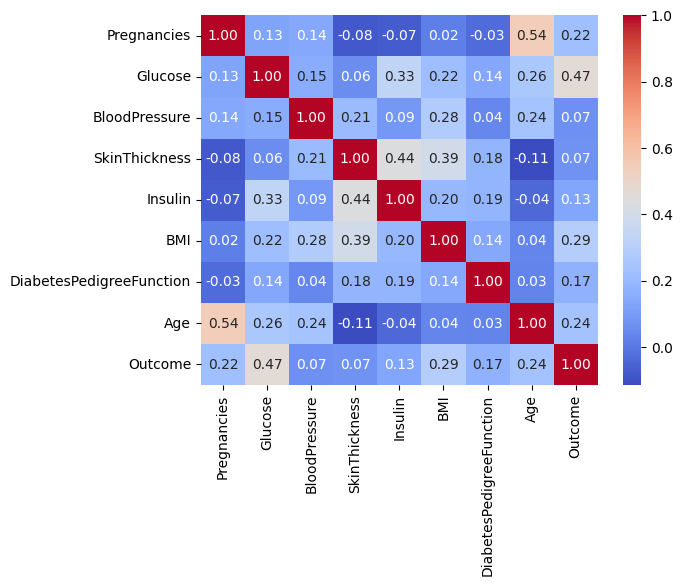

In [20]:
#Q16: Which variables are most strongly correlated in the dataset?
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix  #corr() gives correlation values of all columns with each other
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

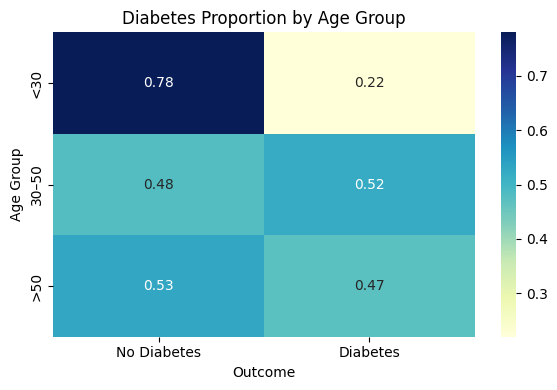

In [30]:
#Q17: How does the proportion of diabetes cases differ across age groups?

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create the data for the heatmap
data = {
    '<30': {0: 0.78, 1: 0.22},
    '30–50': {0: 0.48, 1: 0.52},
    '>50': {0: 0.53, 1: 0.47}
}

# Convert to DataFrame
df1 = pd.DataFrame(data).T
df1.columns = ['No Diabetes', 'Diabetes']

plt.figure(figsize=(6, 4))
sns.heatmap(df1, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Diabetes Proportion by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Outcome')
plt.tight_layout()
plt.savefig("diabetes_heatmap.png")
plt.show()

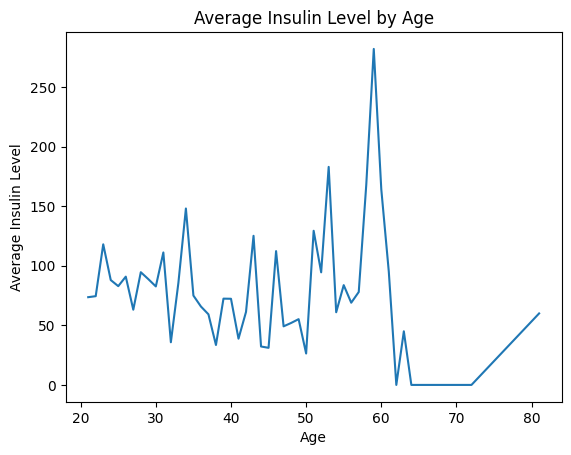

In [35]:
#Q18:  How does average Insulin level change with age?
plt.plot(df.groupby('Age')['Insulin'].mean())
plt.title('Average Insulin Level by Age')
plt.xlabel('Age')
plt.ylabel('Average Insulin Level')
plt.show()

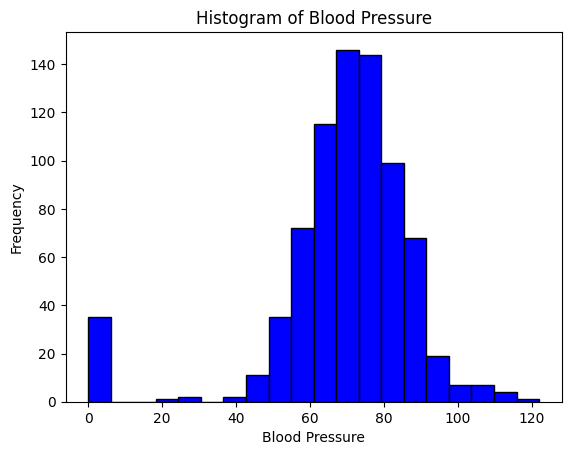

In [36]:
#Q19:Generate a histogram for Bloodpressure. Comment on the distribution.
import matplotlib.pyplot as plt 
plt.hist(df['BloodPressure'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

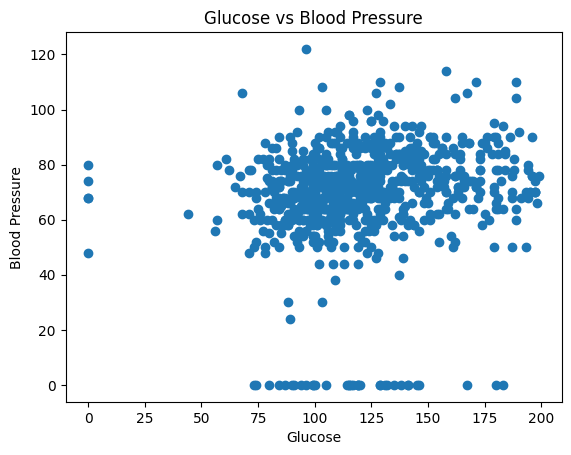

In [37]:
#Q20: How can you visually study the relationship between total glucose and systolic blood pressure?
import matplotlib.pyplot as plt
plt.plot(df['Glucose'], df['BloodPressure'], 'o')
plt.title('Glucose vs Blood Pressure')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.show()
